In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml
import matplotlib

In [3]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy


# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
        

In [7]:
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
English_review = pd.read_csv(r'C:\Users\320066422\Desktop\Python\brazilian-ecommerce\english_review.csv')

In [9]:
English_review

,review_id,order_id,review_score,review_comment_title,review_comment_message
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,I received well before the deadline.
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Congratulations lannister stores loved buying ...
...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excellent backpack, super fast delivery. Super..."
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,I requested to buy a Celtic / Prism / Meriva -...


In [10]:
good_reviews = English_review[English_review['review_score']>=4]
bad_reviews = English_review[English_review['review_score']<4]

In [11]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')

C:\Users\320066422\AppData\Local\Continuum\anaconda3\lib\site-packages\nltk\decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""
C:\Users\320066422\AppData\Local\Continuum\anaconda3\lib\site-packages\nltk\lm\counter.py:15: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, defaultdict
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\320066422\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\320066422\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
#define stop words
stop_words = nltk.corpus.stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 
                   'go', 'get', 'do', 'done', 'try', 'many', 'some', 'thank', 'think', 'see', 'rather', 'easy',
                   'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 
                   'may', 'take', 'came','bought'])

In [13]:
############Good review############

In [14]:
#tokenize words and cleanup
good_comments = good_reviews['review_comment_message']
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

good_data_words = list(sent_to_words(good_comments))

print(good_data_words[1:10])

[['nan'], ['nan'], ['received', 'well', 'before', 'the', 'deadline'], ['congratulations', 'lannister', 'stores', 'loved', 'buying', 'safe', 'and', 'practical', 'internet', 'congratulations', 'to', 'all', 'happy', 'easter'], ['nan'], ['nan'], ['nan'], ['efficient', 'appliance', 'on', 'the', 'site', 'the', 'brand', 'of', 'the', 'device', 'is', 'printed', 'as', 'desinfector', 'and', 'when', 'it', 'arrives', 'with', 'another', 'name', 'update', 'with', 'the', 'correct', 'brand', 'since', 'it', 'is', 'the', 'same', 'device'], ['nan']]


In [15]:
#Creating Bigram and Trigram Models
# Build the bigram and trigram models
bigram = gensim.models.Phrases(good_data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[good_data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[good_data_words[1:10]]])

In [16]:
#Remove Stopwords, Make Bigrams and Lemmatize
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [47]:
# Remove Stop Words
data_words_nostops = remove_stopwords(good_data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
import en_core_web_sm
nlp = en_core_web_sm.load()

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[1:10])

[[], [], ['receive', 'well', 'deadline'], ['congratulation', 'lannister', 'store', 'love', 'buy', 'safe', 'practical', 'internet', 'congratulation', 'happy', 'easter'], [], [], [], ['efficient', 'appliance', 'site', 'brand', 'device', 'print', 'desinfector', 'arrive', 'name', 'update', 'correct', 'brand', 'device'], []]


In [48]:
#Create the Dictionary and Corpus needed for Topic Modeling
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[1:10])

[[], [], [(0, 1), (1, 1), (2, 1)], [(3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)], [], [], [], [(13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)], []]


In [49]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


In [21]:
#View the topics in LDA model
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus[1:10]]

[(0,
  '0.593*"deadline" + 0.370*"receive" + 0.000*"excellent" + 0.000*"perfect" + '
  '0.000*"satisfied" + 0.000*"condition" + 0.000*"like" + 0.000*"long" + '
  '0.000*"service" + 0.000*"day"'),
 (1,
  '0.561*"love" + 0.338*"beautiful" + 0.035*"think" + 0.000*"excellent" + '
  '0.000*"perfect" + 0.000*"satisfied" + 0.000*"like" + 0.000*"day" + '
  '0.000*"price" + 0.000*"condition"'),
 (2,
  '0.457*"d" + 0.359*"_" + 0.044*"miss" + 0.036*"trust" + 0.000*"excellent" + '
  '0.000*"perfect" + 0.000*"condition" + 0.000*"satisfied" + 0.000*"ok" + '
  '0.000*"service"'),
 (3,
  '0.564*"great" + 0.121*"always" + 0.118*"package" + 0.071*"thank" + '
  '0.053*"much" + 0.023*"shipping" + 0.016*"hope" + 0.000*"excellent" + '
  '0.000*"perfect" + 0.000*"satisfied"'),
 (4,
  '0.000*"floral" + 0.000*"enchant" + 0.000*"bedspread" + '
  '0.000*"professional_x" + 0.000*"pointer" + 0.000*"oxyflow" + '
  '0.000*"unanswered" + 0.000*"alcoholism" + 0.000*"office" + 0.000*"sileide"'),
 (5,
  '0.826*"product"

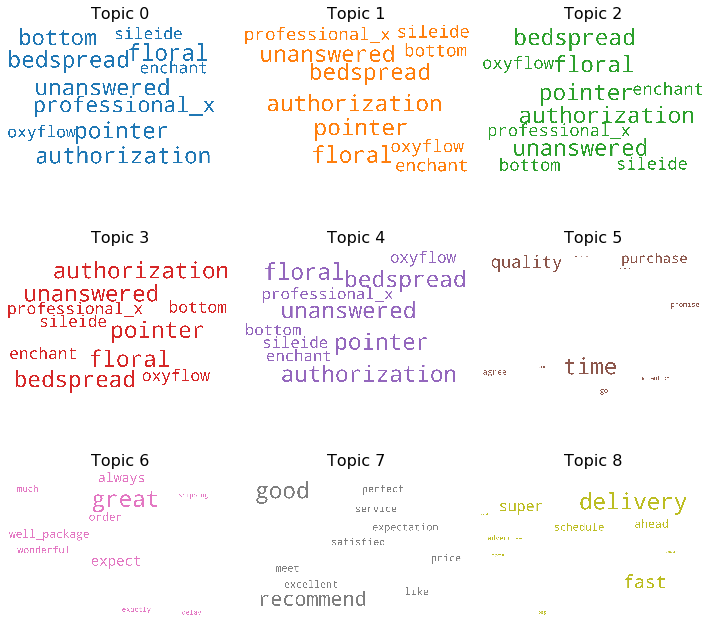

In [52]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=3000,
                  height=2000,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
########Bad review#########

In [42]:
#tokenize words and cleanup
bad_comments = bad_reviews['review_comment_message']
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

bad_data_words = list(sent_to_words(bad_comments))

print(bad_data_words[1:10])


[['nan'], ['would', 'like', 'to', 'know', 'what', 'there', 'was', 'always', 'got', 'it', 'and', 'that', 'purchase', 'now', 'depicted', 'me'], ['nan'], ['poor'], ['did', 'not', 'like', 'it', 'bought', 'cat', 'for', 'hare'], ['always', 'buy', 'over', 'the', 'internet', 'and', 'delivery', 'takes', 'place', 'before', 'the', 'agreed', 'deadline', 'which', 'believe', 'is', 'the', 'deadline', 'at', 'stark', 'the', 'deadline', 'has', 'already', 'expired', 'and', 'have', 'not', 'received', 'the', 'product', 'yet'], ['no', 'getting', 'my', 'request'], ['nan'], ['nan']]


In [43]:
#Creating Bigram and Trigram Models
# Build the bigram and trigram models
bigram = gensim.models.Phrases(bad_data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[bad_data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Remove Stop Words
bad_data_words_nostops = remove_stopwords(bad_data_words)

# Form Bigrams
bad_data_words_bigrams = make_bigrams(bad_data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
import en_core_web_sm
nlp = en_core_web_sm.load()

# Do lemmatization keeping only noun, adj, vb, adv
bad_data_lemmatized = lemmatization(bad_data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

#Create the Dictionary and Corpus needed for Topic Modeling
# Create Dictionary
id2word = corpora.Dictionary(bad_data_lemmatized)

# Create Corpus
texts = bad_data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

#View the topics in LDA model
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus[1:10]]

[(0,
  '0.678*"receive" + 0.127*"yet" + 0.106*"already" + 0.027*"place" + '
  '0.026*"stark" + 0.000*"still" + 0.000*"wrong" + 0.000*"post_office" + '
  '0.000*"delay" + 0.000*"company"'),
 (1,
  '0.301*"delivery" + 0.174*"far" + 0.146*"day" + 0.080*"bad" + 0.071*"come" + '
  '0.056*"date" + 0.035*"today" + 0.033*"part" + 0.018*"post" + 0.018*"think"'),
 (2,
  '0.365*"work" + 0.155*"beautiful" + 0.083*"ugly" + 0.083*"finish" + '
  '0.000*"room" + 0.000*"expectation" + 0.000*"meet" + 0.000*"little" + '
  '0.000*"house" + 0.000*"look"'),
 (3,
  '0.687*"request" + 0.000*"exchange" + 0.000*"wrong" + 0.000*"cartridge" + '
  '0.000*"side" + 0.000*"solve" + 0.000*"value" + 0.000*"black" + '
  '0.000*"dispatch" + 0.000*"waste"'),
 (4,
  '0.770*"arrive" + 0.054*"pass" + 0.027*"screen" + 0.022*"stop" + '
  '0.016*"accord" + 0.000*"still" + 0.000*"wrong" + 0.000*"post_office" + '
  '0.000*"company" + 0.000*"back"'),
 (5,
  '0.333*"store" + 0.204*"lannister" + 0.080*"find" + 0.057*"freight" + '
  

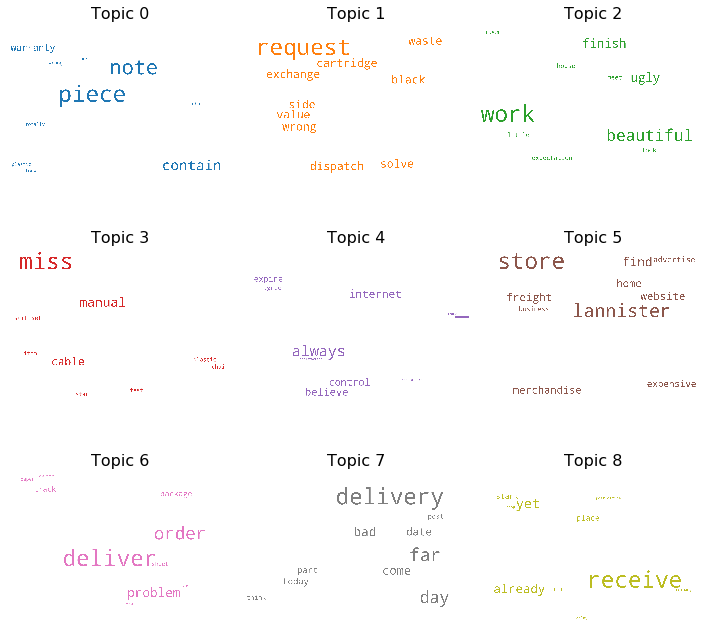

In [44]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=3000,
                  height=2000,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [46]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\320066422\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
14    -0.317472  0.363808       1        1  28.884529
0     -0.208500 -0.246828       2        1  10.643574
1     -0.171426 -0.137297       3        1   9.165625
7     -0.155652 -0.108748       4        1   7.955559
5     -0.049628 -0.020171       5        1   4.713282
13    -0.037323 -0.014167       6        1   4.283009
16    -0.005126 -0.003211       7        1   4.190395
19    -0.021885 -0.008910       8        1   3.911658
15     0.001626 -0.001059       9        1   3.806037
10     0.020100  0.003853      10        1   3.613641
11     0.015161  0.002705      11        1   3.452212
4      0.012097  0.001586      12        1   3.328593
17     0.046181  0.010214      13        1   2.992985
12     0.072907  0.015626      14        1   2.168519
18     0.063567  0.013857      15        1   2.168380
6      0.107811  0.021373      16        1   1.603837
9      0.139707  0.025305      17        1   0.945844
2      0.156452  0.026915      18        1   0.905515
3      0.155625  0.026847      19        1   0.847509
8      0.175777  0.028303      20        1   0.419302, topic_info=    Category          Freq     Term         Total  loglift  logprob
14   Default  15232.000000  product  15232.000000  30.0000   30.000
15   Default   7494.000000  receive   7494.000000  29.0000   29.000
58   Default   4090.000000  deliver   4090.000000  28.0000   28.000
50   Default   2664.000000   arrive   2664.000000  27.0000   27.000
35   Default   2184.000000     time   2184.000000  26.0000   26.000
..       ...           ...      ...           ...      ...      ...
751  Topic20      0.037955     hand      1.463192   1.8224   -9.348
546  Topic20      0.037956     item      1.463594   1.8221   -9.348
387  Topic20      0.037956   little      1.463471   1.8222   -9.348
323  Topic20      0.037957    still      1.464269   1.8217   -9.348
252  Topic20      0.037956  company      1.463900   1.8219   -9.348

[898 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
20       16  0.997907          _
153      12  0.982361     accord
39        1  0.985321         ad
186       7  0.993811    address
157       5  0.991182  advertise
...     ...       ...        ...
147       5  0.994732    website
152       8  0.996911       well
78       18  0.995402       work
234       9  0.973503    wrinkle
18        2  0.998748        yet

[172 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 1, 2, 8, 6, 14, 17, 20, 16, 11, 12, 5, 18, 13, 19, 7, 10, 3, 4, 9])

In [61]:
good_reviews.to_csv('good_English_reviews.csv')

In [62]:
bad_reviews.to_csv('bad_English_reviews.csv')